In [28]:
# packages

import numpy as np
import pandas as pd
import json
import matplotlib as plt
%matplotlib inline

In [3]:
# reading the dataset

with open('data/wine-reviews-130k.json') as file:
    data = json.load(file)
wine_reviews = pd.DataFrame(data)

wine_reviews.info()
wine_reviews.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 129971 non-null  object 
 1   title                  129971 non-null  object 
 2   description            129971 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  120975 non-null  float64
 6   designation            92506 non-null   object 
 7   variety                129970 non-null  object 
 8   region_1               108724 non-null  object 
 9   region_2               50511 non-null   object 
 10  province               129908 non-null  object 
 11  country                129908 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), object(12)
memory usage: 12.9+ MB


,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


<AxesSubplot:>

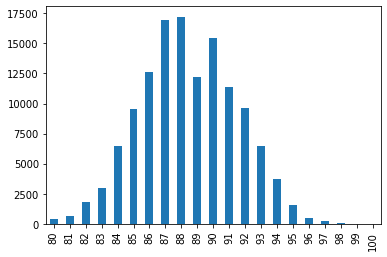

In [81]:
# the distribution of points
wine_reviews['points'].astype(int).value_counts(sort=False).plot.bar()

In [151]:
# the most popular wine varieties based on the quantity of reviews (plus the avg points)
varieties = wine_reviews['variety'].value_counts().head(20).index
averages = wine_reviews[wine_reviews['variety'].isin(varieties)][['variety', 'points']].astype({'variety': object, 'points': int}).groupby('variety').mean()
for i in range(20):
    print(str(i+1) + '. ' + varieties[i] + ' - ' + str(round(averages.at[varieties[i], 'points'], 2)))

1. Pinot Noir - 89.41
2. Chardonnay - 88.34
3. Cabernet Sauvignon - 88.61
4. Red Blend - 88.38
5. Bordeaux-style Red Blend - 89.11
6. Riesling - 89.45
7. Sauvignon Blanc - 87.43
8. Syrah - 89.29
9. Rosé - 86.85
10. Merlot - 87.21
11. Nebbiolo - 90.25
12. Zinfandel - 87.83
13. Sangiovese - 88.55
14. Malbec - 87.98
15. Portuguese Red - 88.81
16. White Blend - 87.35
17. Sparkling Blend - 88.05
18. Tempranillo - 87.51
19. Rhône-style Red Blend - 89.15
20. Pinot Gris - 88.5


In [157]:
# the most popular wine tasters based on the quantity of reviews (plus the avg points)
tasters = wine_reviews['taster_name'].value_counts().index
averages = wine_reviews[wine_reviews['taster_name'].isin(tasters)][['taster_name', 'points']].astype({'taster_name': object, 'points': int}).groupby('taster_name').mean()
for i in range(len(tasters)):
    print(str(i+1) + '. ' + tasters[i] + ' - ' + str(round(averages.at[tasters[i], 'points'], 2)))


1. Roger Voss - 88.71
2. Michael Schachner - 86.91
3. Kerin O’Keefe - 88.87
4. Virginie Boone - 89.21
5. Paul Gregutt - 89.08
6. Matt Kettmann - 90.01
7. Joe Czerwinski - 88.54
8. Sean P. Sullivan - 88.76
9. Anna Lee C. Iijima - 88.42
10. Jim Gordon - 88.63
11. Anne Krebiehl MW - 90.56
12. Lauren Buzzeo - 87.74
13. Susan Kostrzewa - 86.61
14. Mike DeSimone - 89.1
15. Jeff Jenssen - 88.32
16. Alexander Peartree - 85.86
17. Carrie Dykes - 86.4
18. Fiona Adams - 86.89
19. Christina Pickard - 87.83


In [14]:
# the best wine countries based on average points
averages = wine_reviews[['country', 'points']].astype({'country': object,'points': int}).groupby('country').mean().sort_values(by=['points'], ascending=False).head(20)
for i in range(len(averages)):
    print(str(i+1) + '. ' + averages.index[i] + ' - ' + str(round(averages['points'][i], 2)))

1. England - 91.58
2. India - 90.22
3. Austria - 90.1
4. Germany - 89.85
5. Canada - 89.37
6. Hungary - 89.19
7. China - 89.0
8. France - 88.85
9. Luxembourg - 88.67
10. Australia - 88.58
11. Switzerland - 88.57
12. Morocco - 88.57
13. US - 88.56
14. Italy - 88.56
15. Israel - 88.47
16. New Zealand - 88.3
17. Portugal - 88.25
18. Turkey - 88.09
19. Slovenia - 88.07
20. South Africa - 88.06


In [32]:
# best of hungary's wines
pd.set_option("display.max_colwidth", None)
hungary = wine_reviews[wine_reviews['country'] == 'Hungary'].sort_values(by=['points'], ascending=False).head(20)
hungary[['title', 'winery', 'variety', 'points']]

,title,winery,variety,points
45988,Royal Tokaji 2013 6 Puttonyos Aszú Gold Label (Tokaji),Royal Tokaji,White Blend,97
351,Oremus 2005 Eszencia (Tokaji),Oremus,Furmint,96
46002,Royal Tokaji 2013 5 Puttonyos Aszú Red Label (Tokaji),Royal Tokaji,White Blend,96
90912,Dobogó 2007 Aszú 6 Puttonyos (Tokaji),Dobogó,Tokaji,96
63757,Chateau Dereszla 2009 Aszú 5 Puttonyos (Tokaji),Chateau Dereszla,White Blend,95
49326,Royal Tokaji 2003 Essencia (Tokaji),Royal Tokaji,Furmint,94
6575,Royal Tokaji 1999 Mézes Mály Aszú 6 Puttonyos (Tokaji),Royal Tokaji,Tokaji,94
116828,Royal Tokaji 2016 Late Harvest (Tokaji),Royal Tokaji,White Blend,94
46692,Oremus 2014 Late Harvest (Tokaji),Oremus,White Blend,93
105179,Szepsy 2002 Aszú 6 Puttonyos Tokaji (Tokaj),Szepsy,Tokaji,93
